In [1]:
pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [2]:
from util import *
from eda import *
from preprocessing import *
from model import *

In [3]:
dataframes_dict = load_csv_directory_to_df('C:/Users/ALBER/OneDrive/Desktop/Predictive_project_easy')

In [4]:
print('the size of the dataframes is : ' , size(dataframes_dict)/1000 , 'M/bytes')

the size of the dataframes is :  95666.664 M/bytes


In [5]:
import pyarrow as pa
dataframes_dict = {k: optimize_dataframe(v) for k, v in dataframes_dict.items()}
print('the size of the optimized dataframes dict is : ' , size(dataframes_dict)/1000 , 'M/bytes')
for key, df in dataframes_dict.items():
    print(f"Shape of DataFrame '{key}': {df.shape}")
errors , failures , machines , maint,  telemetry  = dataframes_dict.values()
dataframes_dict


the size of the optimized dataframes dict is :  0.685 M/bytes
Shape of DataFrame 'PdM_errors': (3919, 3)
Shape of DataFrame 'PdM_failures': (761, 3)
Shape of DataFrame 'PdM_machines': (100, 3)
Shape of DataFrame 'PdM_maint': (3286, 3)
Shape of DataFrame 'PdM_telemetry': (876100, 6)


{'PdM_errors': shape: (3_919, 3)
 ┌─────────────────────┬───────────┬─────────┐
 │ datetime            ┆ machineID ┆ errorID │
 │ ---                 ┆ ---       ┆ ---     │
 │ cat                 ┆ i8        ┆ cat     │
 ╞═════════════════════╪═══════════╪═════════╡
 │ 2015-01-03 07:00:00 ┆ 1         ┆ error1  │
 │ 2015-01-03 20:00:00 ┆ 1         ┆ error3  │
 │ 2015-01-04 06:00:00 ┆ 1         ┆ error5  │
 │ 2015-01-10 15:00:00 ┆ 1         ┆ error4  │
 │ 2015-01-22 10:00:00 ┆ 1         ┆ error4  │
 │ …                   ┆ …         ┆ …       │
 │ 2015-11-21 08:00:00 ┆ 100       ┆ error2  │
 │ 2015-12-04 02:00:00 ┆ 100       ┆ error1  │
 │ 2015-12-08 06:00:00 ┆ 100       ┆ error2  │
 │ 2015-12-08 06:00:00 ┆ 100       ┆ error3  │
 │ 2015-12-22 03:00:00 ┆ 100       ┆ error3  │
 └─────────────────────┴───────────┴─────────┘,
 'PdM_failures': shape: (761, 3)
 ┌─────────────────────┬───────────┬─────────┐
 │ datetime            ┆ machineID ┆ failure │
 │ ---                 ┆ ---       ┆ ---

#### Failure dataset

In [6]:
# Now, perform the left join
dataset = telemetry.join(failures, left_on= ['datetime','machineID'],right_on=["datetime","machineID"])
failure_dataset = dataset.to_pandas()

C:\Users\ALBER\AppData\Local\Temp\ipykernel_17296\2668370410.py:2: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  dataset = telemetry.join(failures, left_on= ['datetime','machineID'],right_on=["datetime","machineID"])


#### Error dataset

In [7]:
dataset = telemetry.join(errors, left_on= ['datetime','machineID'],right_on=["datetime","machineID"])
errors_dataset = dataset.to_pandas()

C:\Users\ALBER\AppData\Local\Temp\ipykernel_17296\797109068.py:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  dataset = telemetry.join(errors, left_on= ['datetime','machineID'],right_on=["datetime","machineID"])


#### Maintenance dataset

In [8]:
dataset = telemetry.join(maint, left_on= ['datetime','machineID'],right_on=["datetime","machineID"])
maint_dataset = dataset.to_pandas()

C:\Users\ALBER\AppData\Local\Temp\ipykernel_17296\1644171036.py:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  dataset = telemetry.join(maint, left_on= ['datetime','machineID'],right_on=["datetime","machineID"])


#### Complete dataset

In [9]:
dataset = telemetry.join(failures, on=["datetime","machineID"], how="left").join(maint, on=["datetime","machineID"], how="left").join(errors, on=["datetime","machineID"], how="left").join(machines, on="machineID", how="left")
dataset = dataset.to_pandas()

C:\Users\ALBER\AppData\Local\Temp\ipykernel_17296\2054401657.py:1: CategoricalRemappingWarning: Local categoricals have different encodings, expensive re-encoding is done to perform this merge operation. Consider using a StringCache or an Enum type if the categories are known in advance
  dataset = telemetry.join(failures, on=["datetime","machineID"], how="left").join(maint, on=["datetime","machineID"], how="left").join(errors, on=["datetime","machineID"], how="left").join(machines, on="machineID", how="left")


In [10]:
dataset

,datetime,machineID,volt,rotate,pressure,vibration,failure,comp,errorID,model,age
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,NaN,NaN,NaN,model3,18
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,NaN,NaN,NaN,model3,18
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,NaN,NaN,NaN,model3,18
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,NaN,NaN,NaN,model3,18
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,NaN,NaN,NaN,model3,18
...,...,...,...,...,...,...,...,...,...,...,...
877204,2016-01-01 02:00:00,100,179.500,395.25,102.3125,50.781250,NaN,NaN,NaN,model4,5
877205,2016-01-01 03:00:00,100,189.625,446.25,98.1875,35.125000,NaN,NaN,NaN,model4,5
877206,2016-01-01 04:00:00,100,192.500,447.75,94.1250,48.312500,NaN,NaN,NaN,model4,5
877207,2016-01-01 05:00:00,100,165.500,413.75,104.0625,44.843750,NaN,NaN,NaN,model4,5


#### EDA

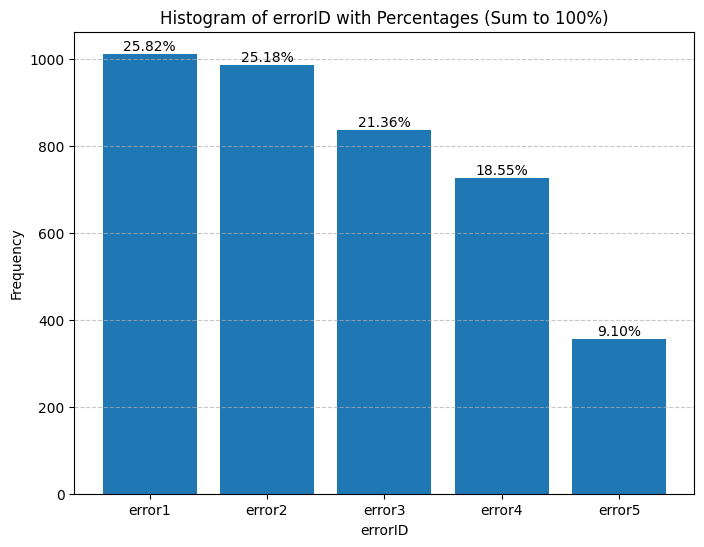

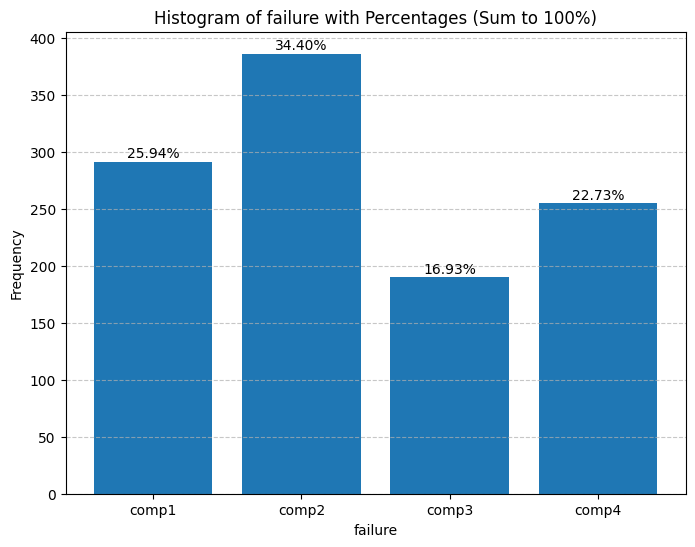

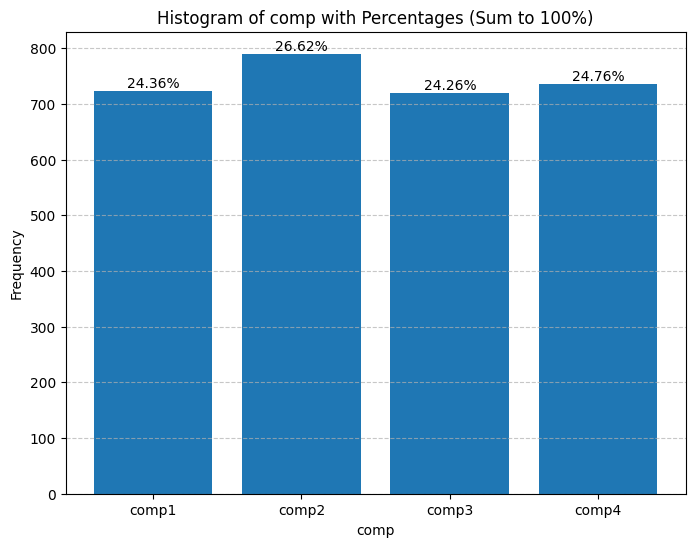

In [11]:
# Plot the histogram with percentages for the 'errorID' column
plot_histogram_with_percentages(dataset, 'errorID')
# Plot the histogram with percentages for the 'errorID' column
plot_histogram_with_percentages(dataset, 'failure')
plot_histogram_with_percentages(dataset, 'comp')

### RUL calculation

In [12]:
dataset= calculate_rul(dataset)

# Print the head of the updated dataset to verify RUL calculation
dataset.head(10000)


,datetime,machineID,volt,rotate,pressure,vibration,failure,comp,errorID,model,age,RUL
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,NaN,NaN,NaN,model3,18,96
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,NaN,NaN,NaN,model3,18,95
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,NaN,NaN,NaN,model3,18,94
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,NaN,NaN,NaN,model3,18,93
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,NaN,NaN,NaN,model3,18,92
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2015-02-21 05:00:00,2,189.750,448.25,90.9375,32.468750,NaN,NaN,NaN,model4,7,627
9996,2015-02-21 06:00:00,2,167.000,480.00,95.6875,39.250000,NaN,NaN,NaN,model4,7,626
9997,2015-02-21 07:00:00,2,172.125,464.00,105.6875,44.343750,NaN,NaN,NaN,model4,7,625
9998,2015-02-21 08:00:00,2,143.625,459.00,119.1250,42.312500,NaN,NaN,NaN,model4,7,624


In [13]:
# Usage example:
dataset = add_cumulative_failures(dataset,"failure",'cumulative_failures')
dataset = add_cumulative_failures(dataset,"errorID", 'cumulative_errors')
dataset = add_cumulative_failures(dataset,"comp", 'cumulative_repairs')
dataset.head(1000)


,datetime,machineID,volt,rotate,pressure,vibration,failure,comp,errorID,model,age,RUL,cumulative_failures,cumulative_errors,cumulative_repairs
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,NaN,NaN,NaN,model3,18,96,0,0,0
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,NaN,NaN,NaN,model3,18,95,0,0,0
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,NaN,NaN,NaN,model3,18,94,0,0,0
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,NaN,NaN,NaN,model3,18,93,0,0,0
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,NaN,NaN,NaN,model3,18,92,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-02-11 14:00:00,1,169.000,362.75,90.2500,35.937500,NaN,NaN,NaN,model3,18,544,2,7,6
996,2015-02-11 15:00:00,1,176.375,437.00,102.9375,41.250000,NaN,NaN,NaN,model3,18,543,2,7,6
997,2015-02-11 16:00:00,1,168.750,530.50,73.1250,35.468750,NaN,NaN,NaN,model3,18,542,2,7,6
998,2015-02-11 17:00:00,1,202.375,423.75,99.0625,38.500000,NaN,NaN,NaN,model3,18,541,2,7,6


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877209 entries, 0 to 877208
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   datetime             877209 non-null  category
 1   machineID            877209 non-null  int8    
 2   volt                 877209 non-null  float32 
 3   rotate               877209 non-null  float32 
 4   pressure             877209 non-null  float32 
 5   vibration            877209 non-null  float32 
 6   failure              1122 non-null    category
 7   comp                 2968 non-null    category
 8   errorID              3924 non-null    category
 9   model                877209 non-null  category
 10  age                  877209 non-null  int8    
 11  RUL                  877209 non-null  int64   
 12  cumulative_failures  877209 non-null  int32   
 13  cumulative_errors    877209 non-null  int32   
 14  cumulative_repairs   877209 non-null  int32   
dtype

In [15]:
updated_dataset = fill_nulls_in_category_column(dataset, 'failure', 'unknown')
updated_dataset = fill_nulls_in_category_column(dataset, 'comp', 'unknown')
updated_dataset = fill_nulls_in_category_column(dataset, 'errorID', 'unknown')

In [16]:
updated_dataset['datetime'] = pd.to_datetime(updated_dataset['datetime'], errors='coerce')

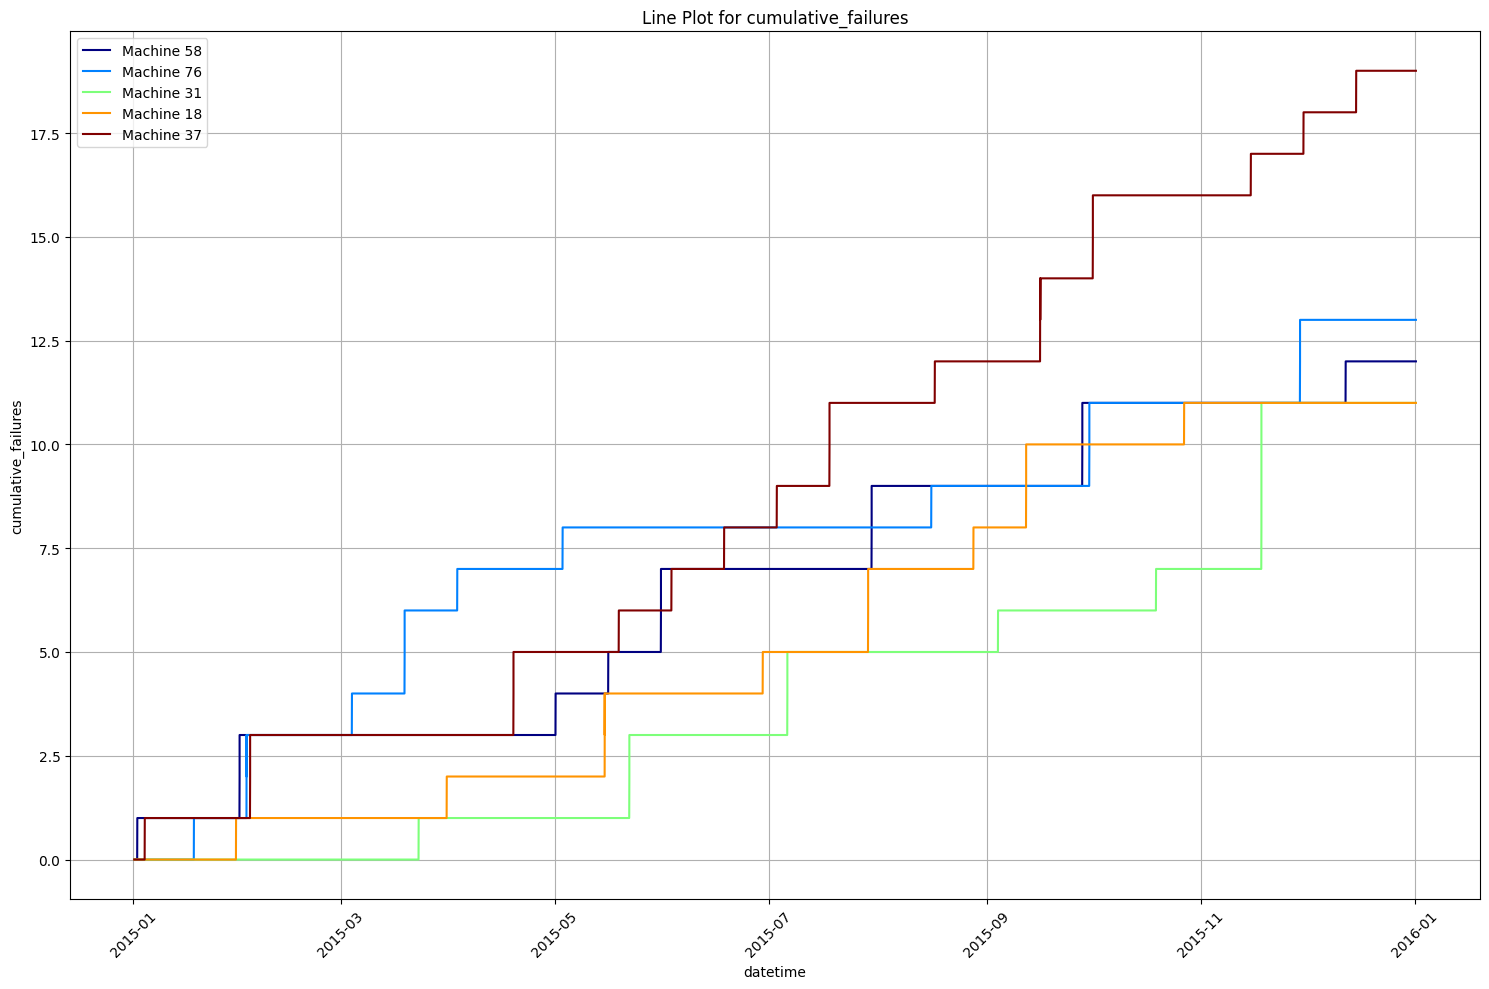

c:\Users\ALBER\OneDrive\Desktop\Predictive_project_easy\eda.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_dataset['datetime_num'] = mdates.date2num(pd.to_datetime(sampled_dataset[datetime_column]))


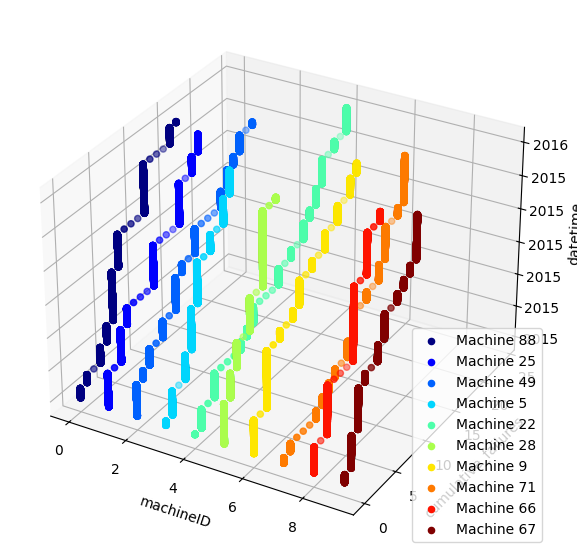

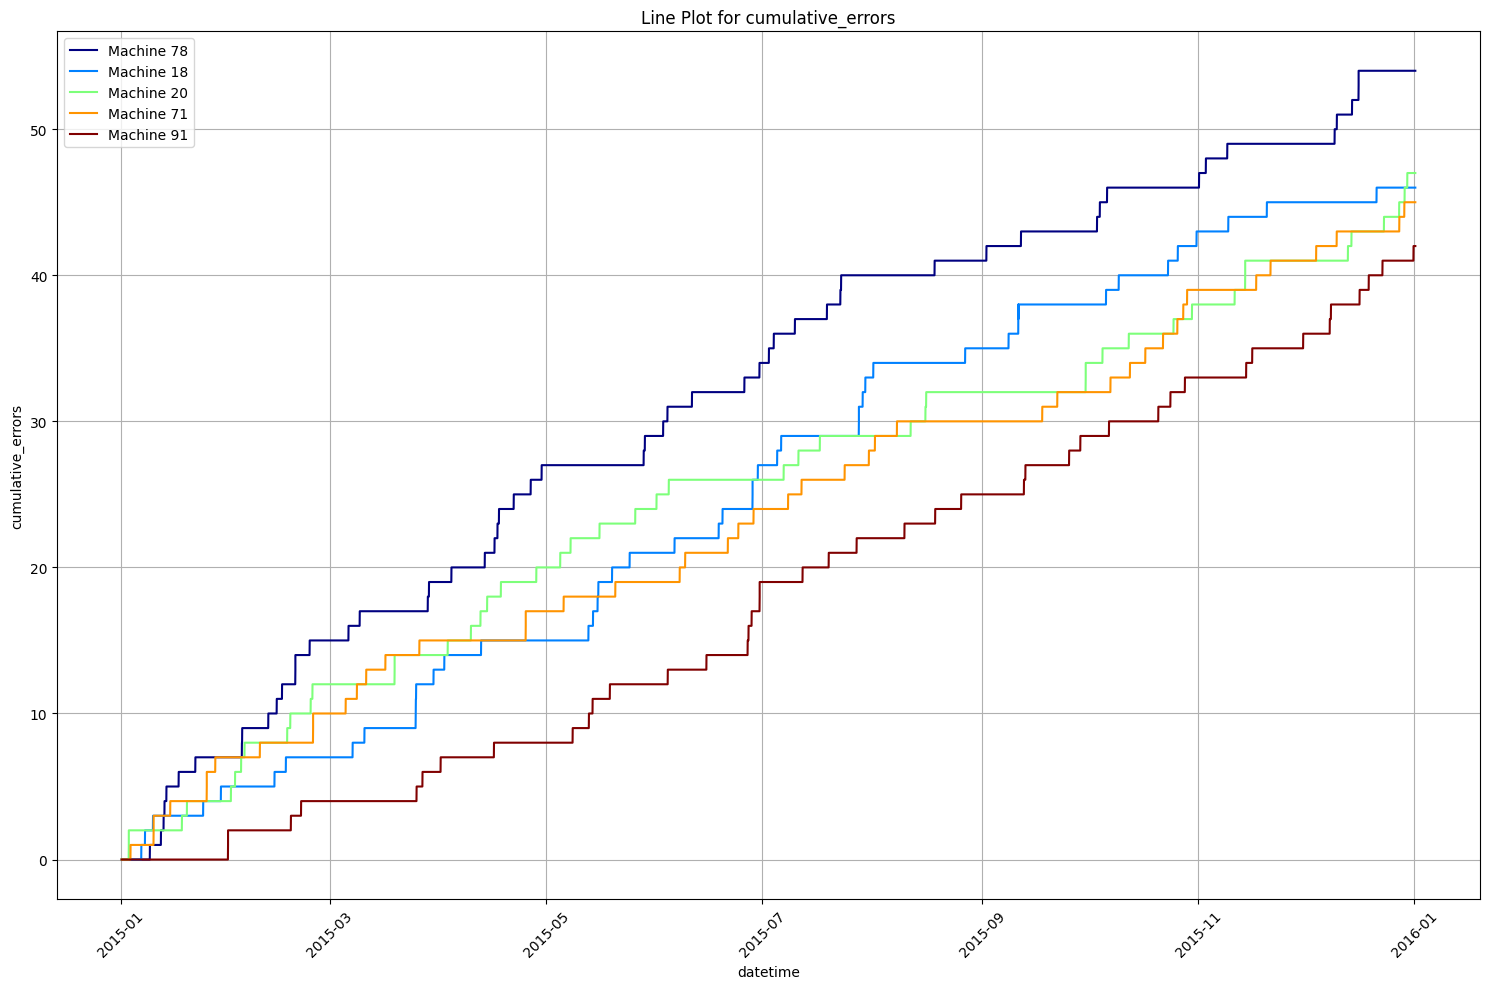

c:\Users\ALBER\OneDrive\Desktop\Predictive_project_easy\eda.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_dataset['datetime_num'] = mdates.date2num(pd.to_datetime(sampled_dataset[datetime_column]))


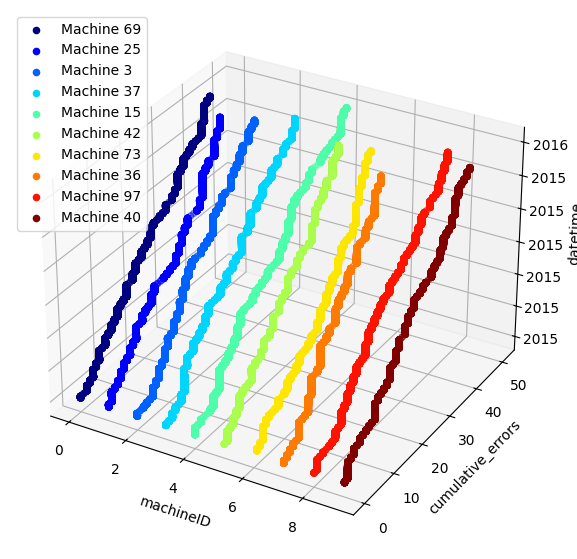

In [17]:
plot_machine_data(updated_dataset, 'cumulative_failures', 5, 'datetime', 'errorID');
plot_3d_with_datetime_sample(updated_dataset, 'machineID', 'cumulative_failures', 'datetime', 10)
plot_machine_data(updated_dataset, 'cumulative_errors', 5, 'datetime', 'errorID');
plot_3d_with_datetime_sample(updated_dataset, 'machineID', 'cumulative_errors', 'datetime', 10)

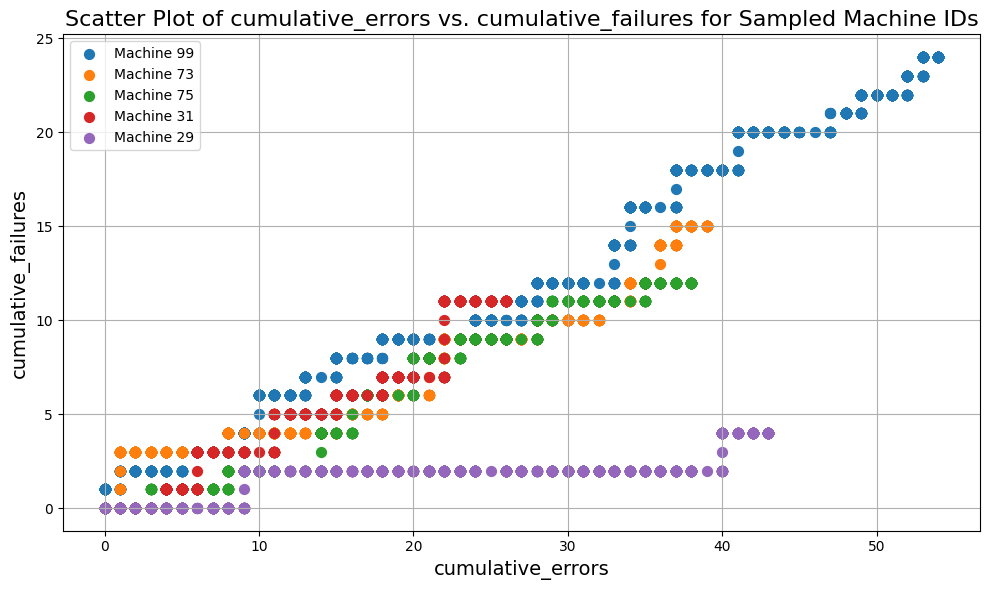

In [18]:
plot_scatter_sampled_machineID(updated_dataset, 'cumulative_errors', 'cumulative_failures', sample_size=5)

In [19]:
updated_dataset

,datetime,machineID,volt,rotate,pressure,vibration,failure,comp,errorID,model,age,RUL,cumulative_failures,cumulative_errors,cumulative_repairs
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,unknown,unknown,unknown,model3,18,96,0,0,0
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,unknown,unknown,unknown,model3,18,95,0,0,0
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,unknown,unknown,unknown,model3,18,94,0,0,0
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,unknown,unknown,unknown,model3,18,93,0,0,0
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,unknown,unknown,unknown,model3,18,92,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877204,2016-01-01 02:00:00,100,179.500,395.25,102.3125,50.781250,unknown,unknown,unknown,model4,5,4,3,31,24
877205,2016-01-01 03:00:00,100,189.625,446.25,98.1875,35.125000,unknown,unknown,unknown,model4,5,3,3,31,24
877206,2016-01-01 04:00:00,100,192.500,447.75,94.1250,48.312500,unknown,unknown,unknown,model4,5,2,3,31,24
877207,2016-01-01 05:00:00,100,165.500,413.75,104.0625,44.843750,unknown,unknown,unknown,model4,5,1,3,31,24


In [20]:
# Assuming 'updated_dataset' is your DataFrame and you want to exclude 'unknown' values.
error_counts_near_end_global = analyze_errors_near_end_rul_global(updated_dataset, 'errorID', rul_threshold=30, exclude_value='unknown')
print("Error Counts Near End of RUL:")
print(error_counts_near_end_global)

Error Counts Near End of RUL:
   errorID  count
0   error3    283
1   error2    274
2   error1    203
3   error5    182
4   error4    149
5  unknown      0


c:\Users\ALBER\OneDrive\Desktop\Predictive_project_easy\eda.py:292: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='errorID', y='count', data=error_counts, palette='viridis')


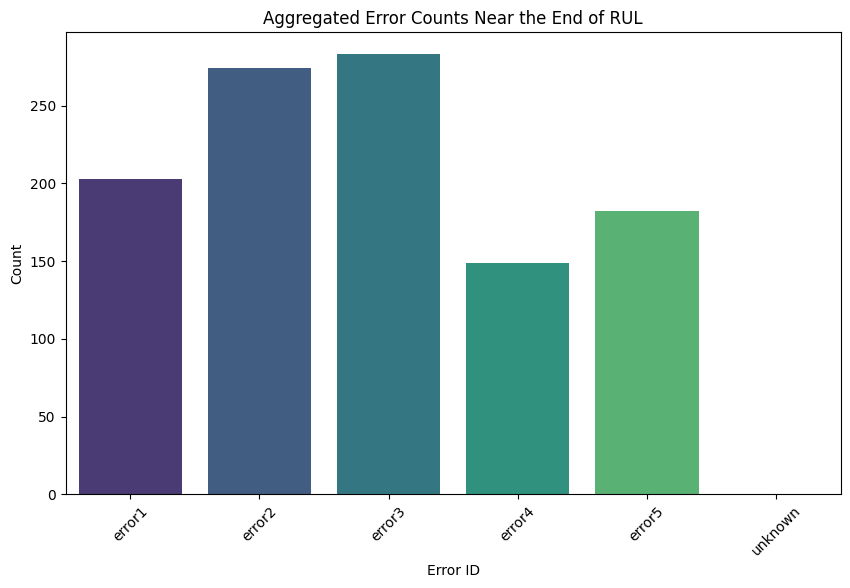

In [21]:
# Assuming error_counts_near_end_global is the DataFrame returned by the function
plot_aggregated_error_counts(error_counts_near_end_global)

In [22]:
updated_dataset

,datetime,machineID,volt,rotate,pressure,vibration,failure,comp,errorID,model,age,RUL,cumulative_failures,cumulative_errors,cumulative_repairs
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,unknown,unknown,unknown,model3,18,96,0,0,0
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,unknown,unknown,unknown,model3,18,95,0,0,0
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,unknown,unknown,unknown,model3,18,94,0,0,0
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,unknown,unknown,unknown,model3,18,93,0,0,0
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,unknown,unknown,unknown,model3,18,92,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877204,2016-01-01 02:00:00,100,179.500,395.25,102.3125,50.781250,unknown,unknown,unknown,model4,5,4,3,31,24
877205,2016-01-01 03:00:00,100,189.625,446.25,98.1875,35.125000,unknown,unknown,unknown,model4,5,3,3,31,24
877206,2016-01-01 04:00:00,100,192.500,447.75,94.1250,48.312500,unknown,unknown,unknown,model4,5,2,3,31,24
877207,2016-01-01 05:00:00,100,165.500,413.75,104.0625,44.843750,unknown,unknown,unknown,model4,5,1,3,31,24


In [23]:
# Assuming error_counts_near_end_global is your DataFrame sorted by 'count' or any other logic
error_order = error_counts_near_end_global['errorID'].tolist()

# Create a dictionary mapping errorID to an ordinal value
error_mapping = {error_id: index for index, error_id in enumerate(error_order)}

print("Encoding Dictionary:", error_mapping)


Encoding Dictionary: {'error3': 0, 'error2': 1, 'error1': 2, 'error5': 3, 'error4': 4, 'unknown': 5}


In [24]:
updated_dataset.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration',
       'failure', 'comp', 'errorID', 'model', 'age', 'RUL',
       'cumulative_failures', 'cumulative_errors', 'cumulative_repairs'],
      dtype='object')

In [25]:
# Assuming df_to_encode is the DataFrame where you want to apply the encoding
updated_dataset['EncodedErrorID'] = updated_dataset['errorID'].map(error_mapping)



print(updated_dataset[['errorID', 'EncodedErrorID']])
updated_dataset.drop('errorID', axis=1, inplace=True)

updated_dataset


        errorID EncodedErrorID
0       unknown              5
1       unknown              5
2       unknown              5
3       unknown              5
4       unknown              5
...         ...            ...
877204  unknown              5
877205  unknown              5
877206  unknown              5
877207  unknown              5
877208  unknown              5

[877209 rows x 2 columns]


,datetime,machineID,volt,rotate,pressure,vibration,failure,comp,model,age,RUL,cumulative_failures,cumulative_errors,cumulative_repairs,EncodedErrorID
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,unknown,unknown,model3,18,96,0,0,0,5
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,unknown,unknown,model3,18,95,0,0,0,5
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,unknown,unknown,model3,18,94,0,0,0,5
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,unknown,unknown,model3,18,93,0,0,0,5
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,unknown,unknown,model3,18,92,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877204,2016-01-01 02:00:00,100,179.500,395.25,102.3125,50.781250,unknown,unknown,model4,5,4,3,31,24,5
877205,2016-01-01 03:00:00,100,189.625,446.25,98.1875,35.125000,unknown,unknown,model4,5,3,3,31,24,5
877206,2016-01-01 04:00:00,100,192.500,447.75,94.1250,48.312500,unknown,unknown,model4,5,2,3,31,24,5
877207,2016-01-01 05:00:00,100,165.500,413.75,104.0625,44.843750,unknown,unknown,model4,5,1,3,31,24,5


### Preprocessing

In [26]:
# Columns to convert to dummies
columns_to_dummies = [ 'failure','comp', "model"]

# Generate dummies for specified columns
dummies = pd.get_dummies(updated_dataset[columns_to_dummies], dtype='int')

# Drop original columns from DataFrame and concatenate with the dummies
df = pd.concat([updated_dataset.drop(columns_to_dummies, axis=1), dummies], axis=1)
df['EncodedErrorID']= df["EncodedErrorID"].astype(int)
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,age,RUL,cumulative_failures,cumulative_errors,...,failure_unknown,comp_comp1,comp_comp2,comp_comp3,comp_comp4,comp_unknown,model_model1,model_model2,model_model3,model_model4
0,2015-01-01 06:00:00,1,176.250,418.50,113.0625,45.093750,18,96,0,0,...,1,0,0,0,0,1,0,0,1,0
1,2015-01-01 07:00:00,1,162.875,402.75,95.4375,43.406250,18,95,0,0,...,1,0,0,0,0,1,0,0,1,0
2,2015-01-01 08:00:00,1,171.000,527.50,75.2500,34.187500,18,94,0,0,...,1,0,0,0,0,1,0,0,1,0
3,2015-01-01 09:00:00,1,162.500,346.25,109.2500,41.125000,18,93,0,0,...,1,0,0,0,0,1,0,0,1,0
4,2015-01-01 10:00:00,1,157.625,435.50,111.8750,25.984375,18,92,0,0,...,1,0,0,0,0,1,0,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877209 entries, 0 to 877208
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datetime             877209 non-null  datetime64[ns]
 1   machineID            877209 non-null  int8          
 2   volt                 877209 non-null  float32       
 3   rotate               877209 non-null  float32       
 4   pressure             877209 non-null  float32       
 5   vibration            877209 non-null  float32       
 6   age                  877209 non-null  int8          
 7   RUL                  877209 non-null  int64         
 8   cumulative_failures  877209 non-null  int32         
 9   cumulative_errors    877209 non-null  int32         
 10  cumulative_repairs   877209 non-null  int32         
 11  EncodedErrorID       877209 non-null  int32         
 12  failure_comp1        877209 non-null  int32         
 13  failure_comp2 

In [28]:
df=df.drop(["cumulative_failures","cumulative_errors" , "cumulative_repairs"],axis=1)

In [29]:
pip install lifelines

#### Benchmark model LSTM

###### Pre-processing for Model in Batches: 


In [30]:
df.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration',
       'age', 'RUL', 'EncodedErrorID', 'failure_comp1', 'failure_comp2',
       'failure_comp3', 'failure_comp4', 'failure_unknown', 'comp_comp1',
       'comp_comp2', 'comp_comp3', 'comp_comp4', 'comp_unknown',
       'model_model1', 'model_model2', 'model_model3', 'model_model4'],
      dtype='object')

Good one : 

In [31]:
# import numpy as np
# from tqdm.auto import tqdm  # Ensure tqdm is imported for progress tracking

# def create_and_pad_sequences_with_progress(df, target_column, sequence_length, padding_value=0, step=1):
#     sequences = []  # To store sequences, including padded ones
#     labels = []  # To store labels for each sequence
    
#     # Ensure required columns are present
#     required_columns = [target_column, 'machineID', 'datetime']
#     if not all(column in df.columns for column in required_columns):
#         raise ValueError(f"DataFrame must contain the following columns: {required_columns}")
    
#     # Iterate through each machineID with progress tracking
#     for _, machine_group in tqdm(df.groupby('machineID'), desc="Processing Machine IDs"):
#         # Filter segments by RUL < 50
#         machine_group = machine_group[machine_group[target_column] < 50]
        
#         # Track segments by splitting at points where RUL resets (if applicable)
#         rul_zero_indices = machine_group.index[machine_group[target_column] == 0].tolist()
#         segment_boundaries = [-1] + rul_zero_indices  # Start from -1 to include the first segment
        
#         for i in range(len(segment_boundaries) - 1):
#             start_index = segment_boundaries[i] + 1
#             end_index = segment_boundaries[i + 1] + 1
#             segment = machine_group.iloc[start_index:end_index]
            
#             # Sort segment by datetime
#             segment = segment.sort_values(by='datetime', ascending=True)
            
#             # Create and pad sequences within this segment with step-wise shifting for augmentation
#             for start_seq in range(0, len(segment) - sequence_length + 1, step):
#                 end_seq = start_seq + sequence_length
#                 sequence = segment.iloc[start_seq:end_seq]
                
#                 # Since we're filtering by RUL < 50, all sequences inherently meet this condition
#                 # No need to check length; it will always be sequence_length long due to the loop condition
#                 sequences.append(sequence.drop([target_column, 'machineID', 'datetime'], axis=1).values)
                
#                 # Determine label for the sequence
#                 label = sequence[target_column].iloc[-1]  # Always use the last RUL value as label
#                 labels.append(label)

#     # Convert sequences and labels to numpy arrays
#     sequence_array = np.array(sequences, dtype=object)  # Use dtype=object for arrays of arrays
#     label_array = np.array(labels)

#     return sequence_array, label_array


In [32]:
# SEQUENCES , LABELS = create_and_pad_sequences_with_progress(df, 'RUL_clipped', 10, padding_value=0)

In [33]:
# len(SEQUENCES)

In [34]:

def create_and_pad_sequences_with_augmentation(df, target_column, sequence_length, padding_value=0, step=5, min_rul=50, num_augmented_batches=30):
    sequences = []  # To store sequences, including padded ones
    labels = []  # To store labels for each sequence
    
    # Ensure required columns are present
    required_columns = [target_column, 'machineID', 'datetime']
    if not all(column in df.columns for column in required_columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")
    
    # Iterate through each machineID with progress tracking
    for _, machine_group in tqdm(df.groupby('machineID'), desc="Processing Machine IDs"):
        # Filter segments by RUL < min_rul
        machine_group = machine_group[machine_group[target_column] < min_rul]
        
        # Track segments by splitting at points where RUL resets (if applicable)
        rul_zero_indices = machine_group.index[machine_group[target_column] == 0].tolist()
        segment_boundaries = [-1] + rul_zero_indices  # Start from -1 to include the first segment
        
        for i in range(len(segment_boundaries) - 1):
            start_index = segment_boundaries[i] + 1
            end_index = segment_boundaries[i + 1] + 1
            segment = machine_group.iloc[start_index:end_index]
            
            # Sort segment by datetime
            segment = segment.sort_values(by='datetime', ascending=True)
            
            # Create and pad sequences within this segment with step-wise shifting for augmentation
            aug_step = 0  # Initialize augmentation step
            while aug_step < num_augmented_batches:
                for start_seq in range(aug_step, len(segment) - sequence_length + 1, step):
                    end_seq = start_seq + sequence_length
                    if end_seq <= len(segment):
                        sequence = segment.iloc[start_seq:end_seq]
                        
                        sequences.append(sequence.drop([target_column, 'machineID', 'datetime'], axis=1).values)
                        label = sequence[target_column].iloc[-1]  # Last RUL value as label
                        labels.append(label)
                aug_step += 1  # Increment to create next batch of augmented sequences

    # Convert sequences and labels to numpy arrays
    sequence_array = np.array(sequences, dtype=object)
    label_array = np.array(labels)

    return sequence_array, label_array


def prepare_dataset_tensors(df, target_column='RUL', sequence_length=10, padding_value=0, test_size=0.2, valid_size=0.1, batch_size=150, shuffle=False):
    """
    Prepares dataset for ML modeling with PyTorch, suitable for LSTM models, using a sliding window approach and padding.
    """
    # Create sequences
    X, y = create_and_pad_sequences_with_augmentation(df, target_column, sequence_length, padding_value)

    # Split dataset into train, validation, and test sets
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=42)
    valid_test_split = valid_size / (1.0 - test_size)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=valid_test_split, shuffle=shuffle, random_state=42)

    # Standardize features (excluding padding)
    scaler = StandardScaler()
    # Fit on training data and transform all data respecting the learned parameters
    num_sequences, sequence_len, num_features = X_train.shape
    X_train = scaler.fit_transform(X_train.reshape(-1, num_features)).reshape(num_sequences, sequence_len, num_features)
    X_valid = scaler.transform(X_valid.reshape(-1, num_features)).reshape(X_valid.shape)
    X_test = scaler.transform(X_test.reshape(-1, num_features)).reshape(X_test.shape)

    # Convert to PyTorch tensors
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float), torch.tensor(y_train, dtype=torch.float))
    valid_dataset = TensorDataset(torch.tensor(X_valid, dtype=torch.float), torch.tensor(y_valid, dtype=torch.float))
    test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float), torch.tensor(y_test, dtype=torch.float))

    # Create DataLoader objects
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=shuffle)
    valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=shuffle)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=shuffle)

    input_size = num_features  # The number of features in each sequence

    return train_loader, valid_loader, test_loader, input_size


#sequence_array, label_array = create_and_pad_sequences_with_augmentation(df, target_column, sequence_length, padding_value=0, step=10, min_rul=100, num_augmented_batches=30)

In [36]:
target_column = 'RUL'
sequence_length = 30
padding_value = 0
test_size = 0.2
valid_size = 0.1
batch_size = 100
shuffle = True

# Prepare your dataset tensors
train_loader, valid_loader, test_loader, input_size = prepare_dataset_tensors(df, target_column=target_column, sequence_length=sequence_length, padding_value=padding_value, test_size=test_size, valid_size=valid_size, batch_size=batch_size, shuffle=shuffle)

print(f"Input size for the LSTM model: {input_size}")


Processing Machine IDs:   0%|          | 0/100 [00:00<?, ?it/s]

Processing Machine IDs: 100%|██████████| 100/100 [01:17<00:00,  1.28it/s]


Input size for the LSTM model: 20


In [38]:
model = LSTMModel(input_size=input_size)
train_losses, valid_losses = train_and_validate_model(model, train_loader, valid_loader, epochs=10)

Epoch 1: Train RMSE: 7.382149751885435, Validation RMSE: 3.6997518629417803
Epoch 2: Train RMSE: 2.4265980799821527, Validation RMSE: 2.160039116395035
Epoch 3: Train RMSE: 1.891342989385121, Validation RMSE: 1.6558256585428717
Epoch 4: Train RMSE: 1.7304450561263145, Validation RMSE: 1.4277650129769193
Epoch 5: Train RMSE: 1.746204565823307, Validation RMSE: 2.422556480236056
Epoch 6: Train RMSE: 2.2565923892425164, Validation RMSE: 1.8487879365511406
Epoch 7: Train RMSE: 1.733192055213985, Validation RMSE: 1.5752266796545806
Epoch 8: Train RMSE: 2.3573464598725042, Validation RMSE: 2.36579779921714
Epoch 9: Train RMSE: 1.9540676389176361, Validation RMSE: 1.824284541079877
Epoch 10: Train RMSE: 1.7484514054741123, Validation RMSE: 2.14324261844657


In [39]:
evaluate_model(model, test_loader)

Test Loss: 2.1204353356103636
Test MAE: 1.3815789222717285


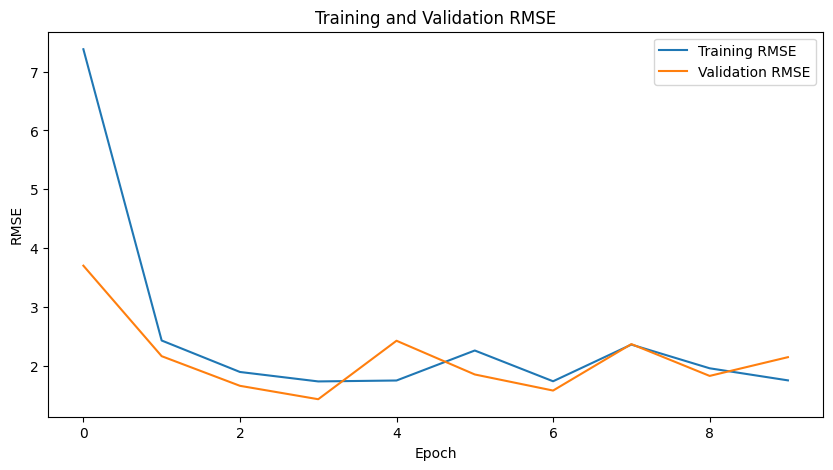

In [40]:
plot_rmse(train_losses, valid_losses)

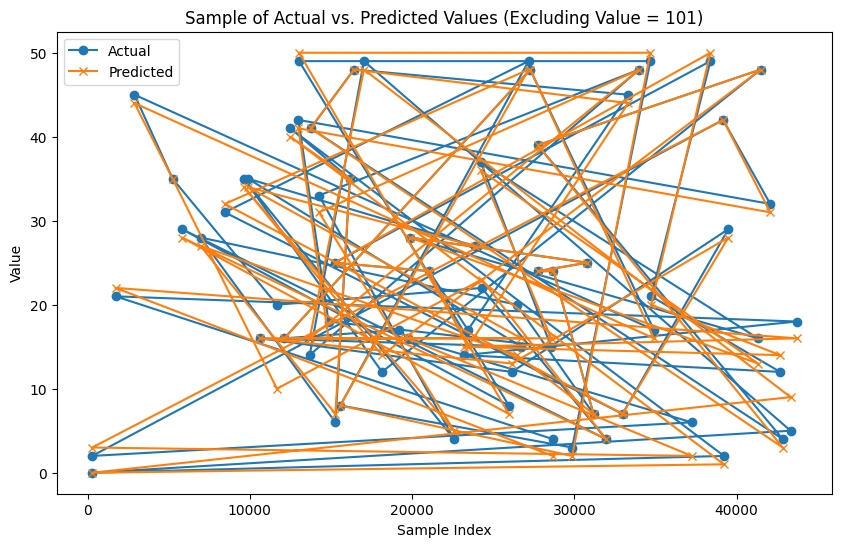

In [49]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def evaluate_and_plot_sample_excluding_value(model, test_loader, exclude_value=51, sample_size=1000):
    """
    Evaluates the model on the test set, clips predictions to a minimum of 0, excludes specific values,
    and plots a sample of actual vs. predicted values excluding the specified value.
    
    Parameters:
    - model: The trained PyTorch model.
    - test_loader: DataLoader for the test set.
    - exclude_value: The value to exclude from actuals and predictions before plotting.
    - sample_size: Number of points to sample for the plot. Default is 1000.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    predictions = []
    actuals = []

    # No gradient computation needed
    with torch.no_grad():
        for inputs, targets in test_loader:
            # Assuming inputs and model are properly configured for device (CPU/GPU)
            outputs = model(inputs)
            
            # Convert outputs and targets to same shape and detach from GPU if necessary
            predictions.extend(outputs.view(-1).cpu().numpy())
            actuals.extend(targets.view(-1).cpu().numpy())

    # Clip predictions to 0 and convert lists to arrays for easier handling
    
    predictions = np.clip(predictions, a_min=0, a_max=None).astype(int)
    actuals = np.array(actuals)

    # Exclude data points where actuals or predictions are equal to exclude_value
    valid_indices = (actuals != exclude_value) & (predictions != exclude_value)
    filtered_predictions = predictions[valid_indices]
    filtered_actuals = actuals[valid_indices]

    # Sampling a subset of filtered predictions and actuals for plotting
    valid_sample_size = min(sample_size, len(filtered_predictions))
    indices = np.random.choice(range(len(filtered_predictions)), size=valid_sample_size, replace=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(indices, filtered_actuals[indices], 'o-', label='Actual')
    plt.plot(indices, filtered_predictions[indices], 'x-', label='Predicted')
    plt.title('Sample of Actual vs. Predicted Values (Excluding Value = {})'.format(exclude_value))
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()4
    plt.show()

# Example usage
# model = YourModel()
# test_loader = DataLoader(...)  # Assuming test_loader is already defined
evaluate_and_plot_sample_excluding_value(model, test_loader, exclude_value=101, sample_size=70)


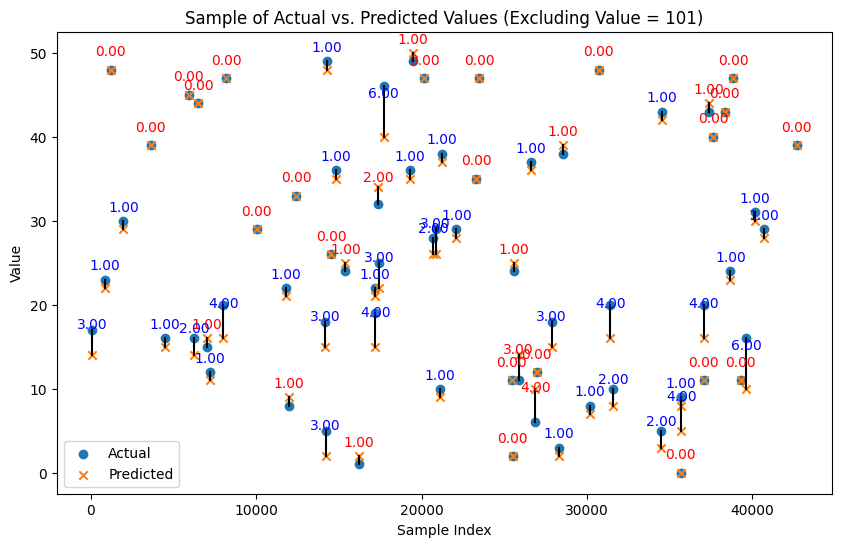

In [52]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def evaluate_and_plot_sample_excluding_value(model, test_loader, exclude_value=51, sample_size=1000):
    model.eval()  # Ensure the model is in evaluation mode

    predictions = []
    actuals = []

    with torch.no_grad():  # No gradient computation needed
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.view(-1).cpu().numpy())
            actuals.extend(targets.view(-1).cpu().numpy())

    predictions = np.clip(predictions, a_min=0, a_max=None).astype(int)  # Clip and convert to integer
    actuals = np.array(actuals)

    # Exclude data points where actuals or predictions are equal to exclude_value
    valid_indices = (actuals != exclude_value) & (predictions != exclude_value)
    filtered_predictions = predictions[valid_indices]
    filtered_actuals = actuals[valid_indices]

    # Calculate differences
    differences = np.abs(filtered_actuals - filtered_predictions)

    # Sampling
    valid_sample_size = min(sample_size, len(filtered_predictions))
    indices = np.random.choice(range(len(filtered_predictions)), size=valid_sample_size, replace=False)

    plt.figure(figsize=(10, 6))
    plt.scatter(indices, filtered_actuals[indices], marker='o', label='Actual')
    plt.scatter(indices, filtered_predictions[indices], marker='x', label='Predicted')
    for i in range(valid_sample_size):
        idx = indices[i]
        actual = filtered_actuals[idx]
        predicted = filtered_predictions[idx]
        diff = differences[idx]
        
        # Determine the color based on whether actual is higher than predicted
        color = 'blue' if actual > predicted else 'red'

        # Draw black line between actual and predicted
        plt.plot([idx, idx], [actual, predicted], 'k-')  # Black line
        
        # Annotate the difference
        plt.annotate(f'{diff:.2f}', (idx, (actual+predicted)/2), textcoords="offset points", xytext=(0,10), ha='center', color=color)

    plt.title('Sample of Actual vs. Predicted Values (Excluding Value = {})'.format(exclude_value))
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage
# model = YourModel()
# test_loader = DataLoader(...)  # Assuming test_loader is already defined
evaluate_and_plot_sample_excluding_value(model, test_loader, exclude_value=101, sample_size=70)


In [60]:
    model.eval()  # Ensure the model is in evaluation mode

    predictions = []
    actuals = []

    with torch.no_grad():  # No gradient computation needed
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.view(-1).cpu().numpy())
            actuals.extend(targets.view(-1).cpu().numpy())

    predictions = np.clip(predictions, a_min=0, a_max=None).astype(int)  # Clip and convert to integer
    actuals = np.array(actuals)

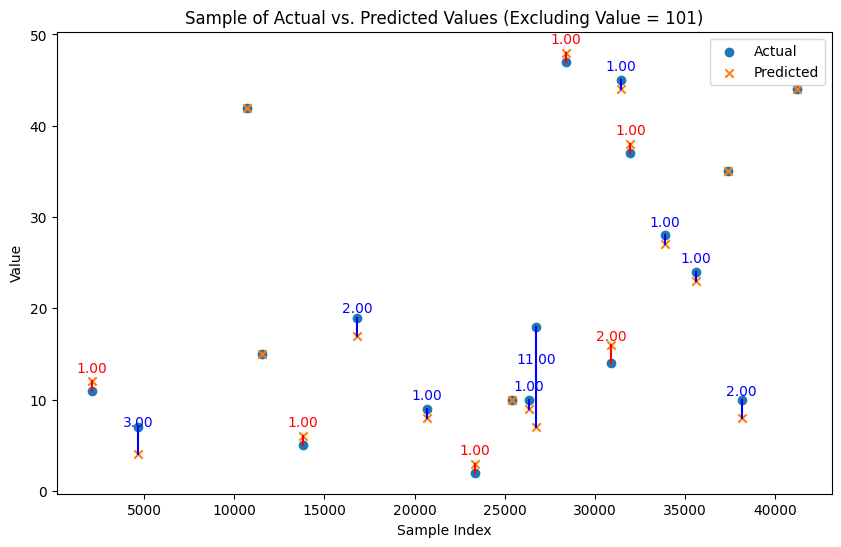

In [63]:

def evaluate_and_plot_sample_excluding_value( exclude_value=51, sample_size=1000):
    model.eval()  # Ensure the model is in evaluation mode

    predictions = []
    actuals = []

    with torch.no_grad():  # No gradient computation needed
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.view(-1).cpu().numpy())
            actuals.extend(targets.view(-1).cpu().numpy())

    predictions = np.clip(predictions, a_min=0, a_max=None).astype(int)  # Clip and convert to integer
    actuals = np.array(actuals)

    # Exclude data points where actuals or predictions are equal to exclude_value
    valid_indices = (actuals != exclude_value) & (predictions != exclude_value)
    filtered_predictions = predictions[valid_indices]
    filtered_actuals = actuals[valid_indices]

    # Calculate differences
    differences = filtered_actuals - filtered_predictions

    # Sampling
    valid_sample_size = min(sample_size, len(filtered_predictions))
    indices = np.random.choice(range(len(filtered_predictions)), size=valid_sample_size, replace=False)

    plt.figure(figsize=(10, 6))
    plt.scatter(indices, filtered_actuals[indices], marker='o', label='Actual')
    plt.scatter(indices, filtered_predictions[indices], marker='x', label='Predicted')
    for i in range(valid_sample_size):
        idx = indices[i]
        actual = filtered_actuals[idx]
        predicted = filtered_predictions[idx]
        diff = differences[idx]
        
        # Determine the color and text based on the comparison
        if diff > 0:  # Actual is higher
            color = 'blue'
        elif diff < 0:  # Predicted is higher
            color = 'red'
        else:  # Exact match
            color = 'black'
        
        # Draw line between actual and predicted with the determined color
        plt.plot([idx, idx], [actual, predicted], color=color)  # Line color reflects the comparison
        
        # Annotate the absolute difference, if not exactly matching
        if diff != 0:
            plt.annotate(f'{abs(diff):.2f}', (idx, (actual+predicted)/2), textcoords="offset points", xytext=(0,10), ha='center', color=color)

    plt.title('Sample of Actual vs. Predicted Values (Excluding Value = {})'.format(exclude_value))
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage
# model = YourModel()
# test_loader = DataLoader(...)  # Assuming test_loader is already defined
evaluate_and_plot_sample_excluding_value( exclude_value=101, sample_size=20)


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_series(series1, series2):
    # Convert series to lists
    series1_list = series1.tolist()
    series2_list = series2.tolist()

    # Create a figure and axes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

    # Use seaborn styles
    sns.set_style("whitegrid")

    # Plot series1 as a line plot
    ax1.plot(series1_list, label='prediction', marker='o', linestyle='-', color='b')

    # Plot series2 as a line plot
    ax1.plot(series2_list, label='true RUL', marker='o', linestyle='--', color='r')

    # Add labels and title
    ax1.set_xlabel('Units')
    ax1.set_ylabel('Remaining Useful Life (RUL)')
    ax1.set_title('Predicted RUL vs True Rul')

    # Increase the line width
    for line in ax1.lines:
        line.set_linewidth(2)

    # Add legend
    ax1.legend()

    # Calculate difference between series1 and series2
    diff = np.array(series1_list) - np.array(series2_list)

    # Create a bar plot for differences
    ax2.bar(range(len(diff)), diff, color='purple')

    # Add labels and title
    ax2.set_xlabel('Units')
    ax2.set_ylabel('Remaining Useful Life (RUL)')
    ax2.set_title('Difference Between Predictions and True RUL')

    # Adjust space between the plots
    plt.tight_layout()

    # Show the plots
    plt.show()


KeyboardInterrupt: 